In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv("/kaggle/input/india-news-head-line/india-news-headlines.csv")

In [3]:
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [4]:
df1=df1[: 40000]

In [5]:
df1.shape

(40000, 3)

In [6]:
df1.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [7]:
df1.duplicated().sum()

907

In [8]:
df1.drop_duplicates(inplace=True)

In [9]:
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [10]:
df1["headline_category"].value_counts()

headline_category
unknown                               8546
india                                 3751
city.bengaluru                        3711
city.hyderabad                        2654
city.lucknow                          2227
business.india-business               2054
city.ahmedabad                        1897
city.mumbai                           1646
city.delhi                            1615
city.kolkata                          1430
city.patna                            1400
city.chandigarh                       1369
city.pune                              969
entertainment.hindi.bollywood          794
city.thiruvananthapuram                595
bombay-times                           586
delhi-times                            467
edit-page                              444
cricket                                417
calcutta-times                         415
pune-times                             388
lucknow-times                          382
home.science                        

In [11]:
df1.replace("unknown", pd.NA, inplace=True)
df1.dropna(inplace=True)

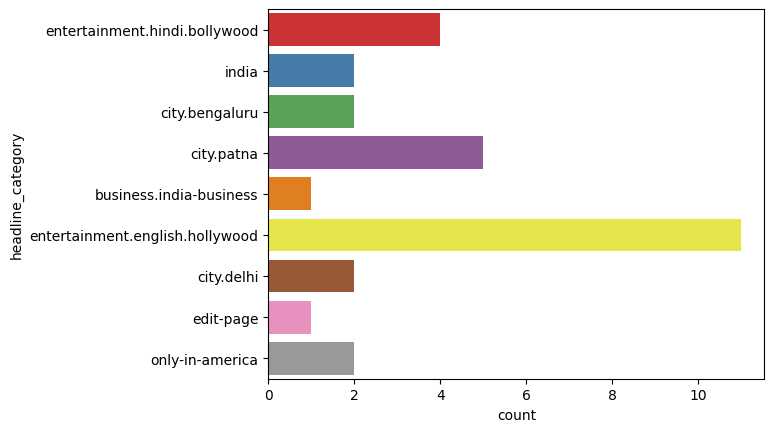

In [12]:
sns.countplot(y="headline_category",data=df1[: 30],palette="Set1")
plt.show()

In [13]:
df1['publish_date']=pd.to_datetime(df1["publish_date"],format="%Y%m%d")
df1.drop(columns="headline_category",axis=1,inplace=True)

In [14]:
df1['headline_text'] = df1.groupby(['publish_date']).transform(lambda x : ' '.join(x)) 

In [15]:
# from bs4 import BeautifulSoup
# import re
# import string
# import nltk
# from nltk.corpus import stopwords

# nltk.download('stopwords')

# def clean_text(text):
#     # Remove HTML tags
#     text = BeautifulSoup(text, 'html.parser').get_text()

#     # Remove special characters and digits
#     text = re.sub(r"[^a-zA-Z]", " ", text)

#     # Remove punctuation
#     text = text.translate(str.maketrans("", "", string.punctuation))

#     # Remove emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)
    
#     # Convert to lowercase
#     text = text.lower()

#     # Remove stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = nltk.word_tokenize(text)
#     tokens = [word for word in tokens if word not in stop_words]

#     return ' '.join(tokens)

In [16]:
df1.reset_index(inplace=True,drop=True)

In [17]:
# df1["headline_text"]=df1["headline_text"].apply(clean_text)
df1.replace("[^a-zA-Z']"," ",regex=True,inplace=True)

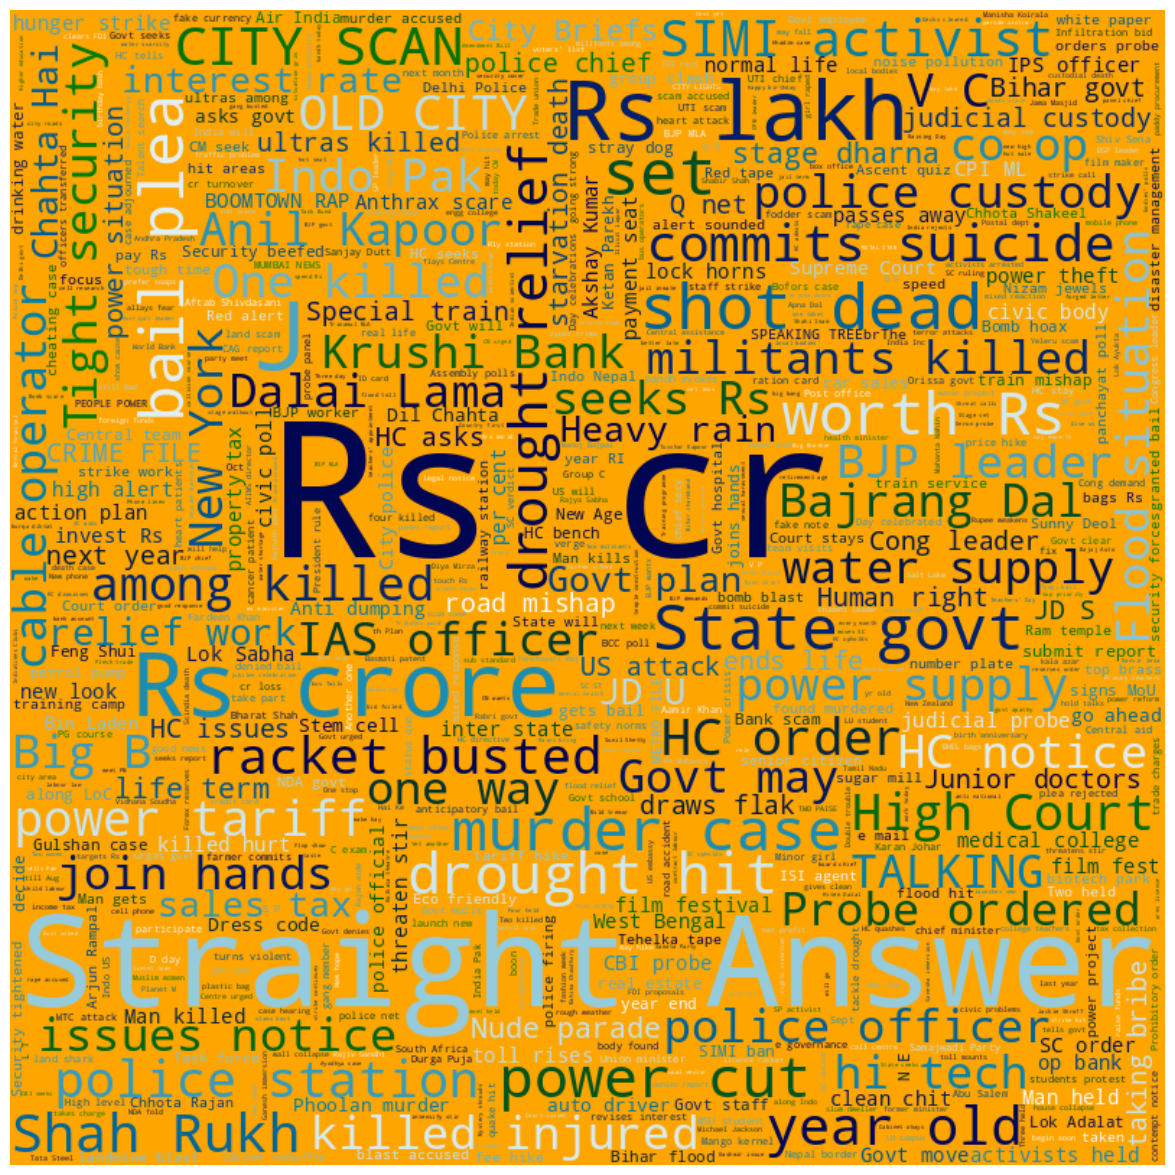

In [18]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(15,15))
all_text=" ".join(df1['headline_text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='orange', max_words=800,colormap="ocean").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

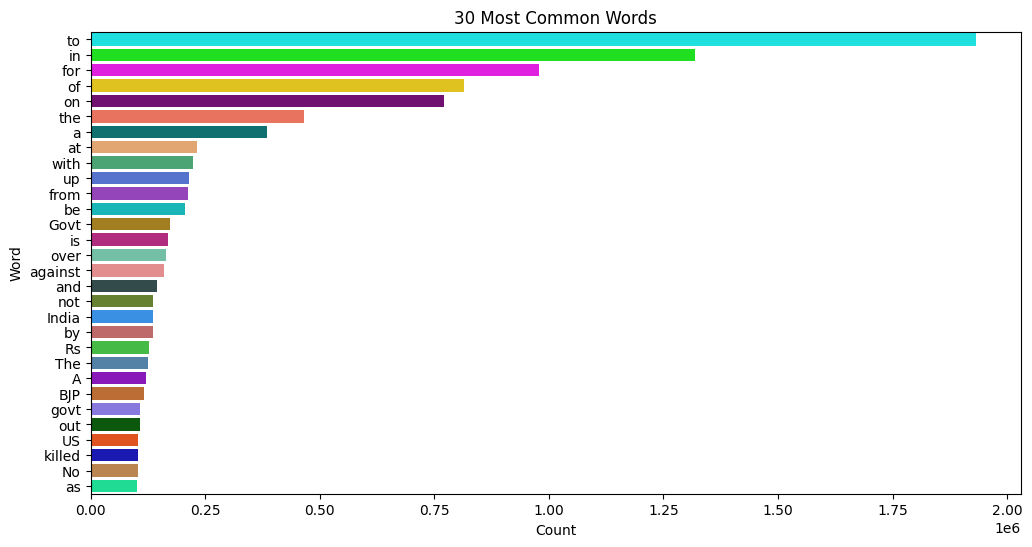

In [19]:
from itertools import chain
from collections import Counter
data_set =df1["headline_text"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Now we need to get the subjectivity and polarity so we will make a function to get them.

In [20]:
from textblob import TextBlob

In [21]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

 
def polarity(text):
    return TextBlob(text).sentiment.polarity

df1["Subjectivity"]=df1["headline_text"].apply(subjectivity)
df1["Polarity"]=df1["headline_text"].apply(polarity)    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


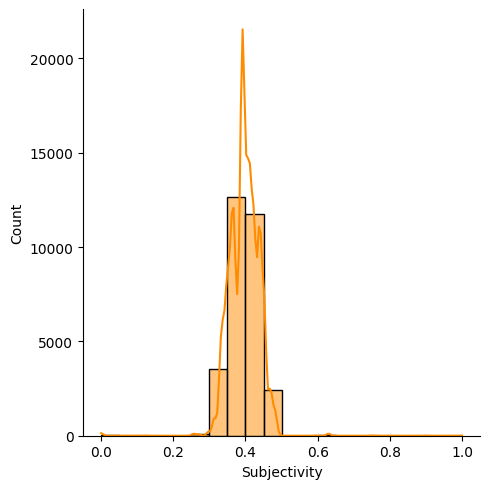

In [22]:
sns.displot(data=df1, x="Subjectivity",bins=20,color="darkorange",kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


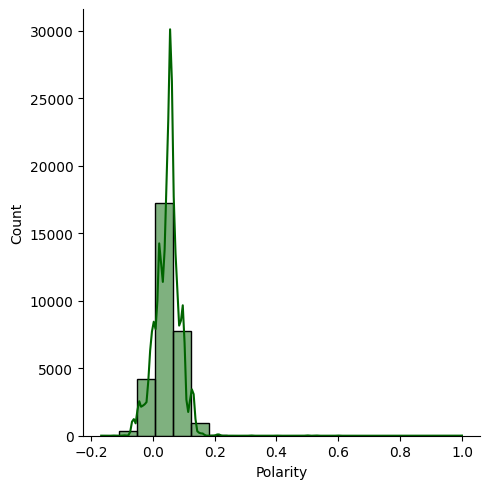

In [23]:
sns.displot(data=df1, x="Polarity",bins=20,color="darkgreen",kde=True)
plt.show()

# Performing Sentiment Analysis over the news Headlines

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
snt = SentimentIntensityAnalyzer()
df1['Compound'] = [snt.polarity_scores(v)['compound'] for v in df1['headline_text']]
df1['Negative'] = [snt.polarity_scores(v)['neg'] for v in df1['headline_text']]
df1['Neutral'] = [snt.polarity_scores(v)['neu'] for v in df1['headline_text']]
df1['Positive'] = [snt.polarity_scores(v)['pos'] for v in df1['headline_text']]
df1

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Raju Chacha,0.000000,0.000000,0.0000,0.000,1.00,0.000
1,2001-01-03,'Devdas' Jinxed,0.000000,0.000000,0.0000,0.000,1.00,0.000
2,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.81,0.067
3,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.81,0.067
4,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.81,0.067
...,...,...,...,...,...,...,...,...
30542,2001-10-26,AUDA uses Canadian tech for quake proof housin...,0.376592,-0.013541,-0.9985,0.172,0.74,0.088
30543,2001-10-26,AUDA uses Canadian tech for quake proof housin...,0.376592,-0.013541,-0.9985,0.172,0.74,0.088
30544,2001-10-26,AUDA uses Canadian tech for quake proof housin...,0.376592,-0.013541,-0.9985,0.172,0.74,0.088
30545,2001-10-26,AUDA uses Canadian tech for quake proof housin...,0.376592,-0.013541,-0.9985,0.172,0.74,0.088


In [25]:
df1.head(100)

,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Raju Chacha,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,2001-01-03,'Devdas' Jinxed,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.810,0.067
3,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.810,0.067
4,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.000000,0.000000,-0.3670,0.123,0.810,0.067
...,...,...,...,...,...,...,...,...
95,2001-05-22,She turned and fought Re negotiation best Des...,0.352083,0.025643,-0.9901,0.186,0.722,0.092
96,2001-05-22,She turned and fought Re negotiation best Des...,0.352083,0.025643,-0.9901,0.186,0.722,0.092
97,2001-05-22,She turned and fought Re negotiation best Des...,0.352083,0.025643,-0.9901,0.186,0.722,0.092
98,2001-05-22,She turned and fought Re negotiation best Des...,0.352083,0.025643,-0.9901,0.186,0.722,0.092


In [26]:
df2=pd.read_csv("/kaggle/input/stock-market-dataset/stocks/AAMC.csv")

In [27]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-13,15.0,15.0,15.0,15.0,15.0,100
1,2012-12-14,19.0,30.0,19.0,30.0,30.0,144600
2,2012-12-17,31.5,65.0,31.5,65.0,65.0,68600
3,2012-12-18,65.0,89.0,65.0,80.0,80.0,43600
4,2012-12-19,80.0,84.0,78.0,84.0,84.0,24000


In [28]:
df2.shape

(1837, 7)

In [29]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,198.136788,203.548628,192.938672,198.660218,198.660218,12997.332608
std,283.411544,290.760721,276.072627,284.056460,284.056460,21258.681642
min,8.410000,9.160000,7.600000,7.990000,7.990000,0.000000
25%,24.000000,25.129999,22.590000,23.990000,23.990000,1500.000000
50%,68.900002,70.099998,67.599998,69.199997,69.199997,5800.000000
75%,215.000000,222.520004,208.000000,216.500000,216.500000,16100.000000
max,1195.000000,1209.000000,1166.000000,1196.359985,1196.359985,300100.000000


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1837 non-null   object 
 1   Open       1837 non-null   float64
 2   High       1837 non-null   float64
 3   Low        1837 non-null   float64
 4   Close      1837 non-null   float64
 5   Adj Close  1837 non-null   float64
 6   Volume     1837 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.6+ KB


In [32]:
df2["Date"] = pd.to_datetime(df2["Date"],format='%Y-%m-%d')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


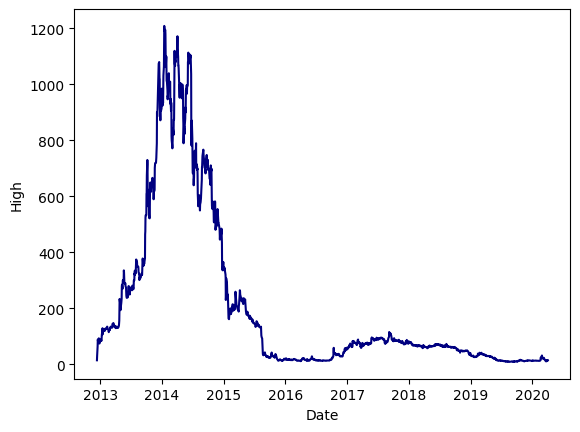

In [33]:
sns.lineplot(data=df2, x="Date", y="High",color="navy")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


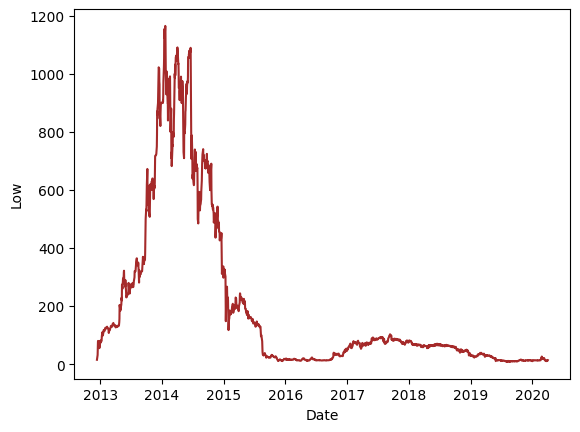

In [34]:
sns.lineplot(data=df2, x="Date", y="Low",color="brown")
plt.show()

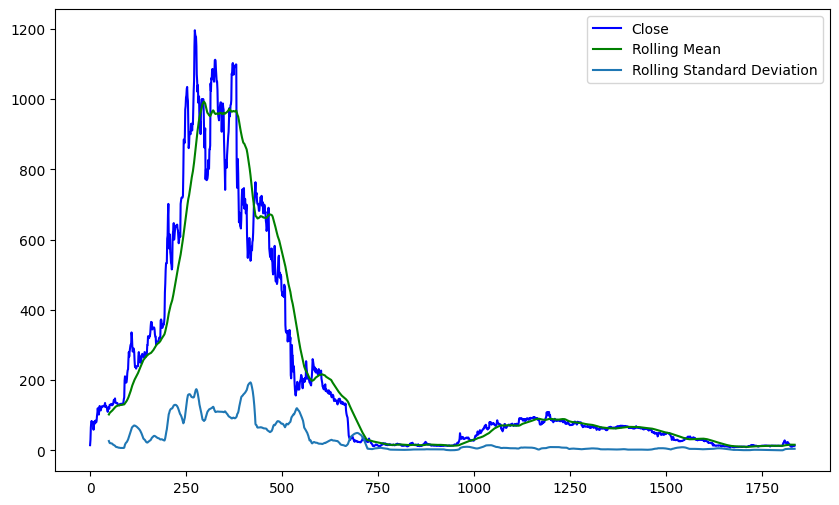

In [35]:
close = df2['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10,6))
df2['Close'].plot(color='blue',label='Close')
ma.plot(color = 'green',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()
plt.show()

In [36]:
#split the data to train and test
train = df2[:300]
test = df2[300:]

# Rolling mean and Standard Deviation


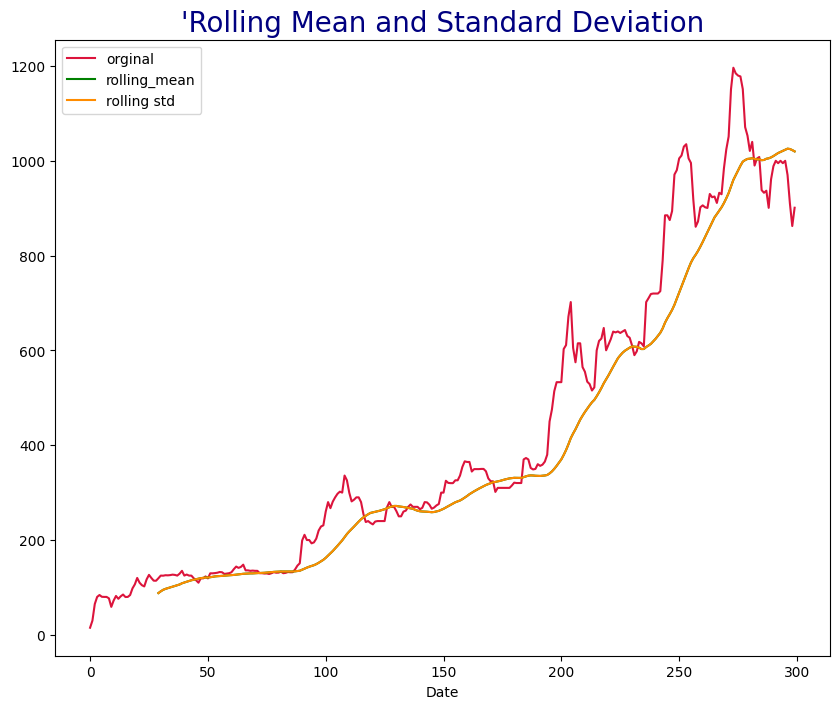




Result of dickey fuller test
ADF Test Statistic : -0.5137593464423471
p-value : 0.889303369009611
#Lags Used : 1
Number of Observations Used : 298
Weak evidence against null hypothesis, time series is non-stationary


In [37]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    rol_mean=timeseries.rolling(30).mean()
    rol_std=timeseries.rolling(30).mean()
    
    plt.figure(figsize=(10,8))
    plt.plot(timeseries,color="crimson",label="orginal")
    plt.plot(rol_mean,color="green",label="rolling_mean")
    plt.plot(rol_std,color="darkorange",label="rolling std")
    plt.xlabel("Date")
    plt.legend()
    plt.title("'Rolling Mean and Standard Deviation",  fontsize = 20,color="navy")
    plt.show()
    print("\n\n")
    print("Result of dickey fuller test")
    result=adfuller(timeseries,autolag="AIC")
    label=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,label):
        print(label+" : "+str(value))
    
    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary")
        
test_stationary(train["Close"])
    
    

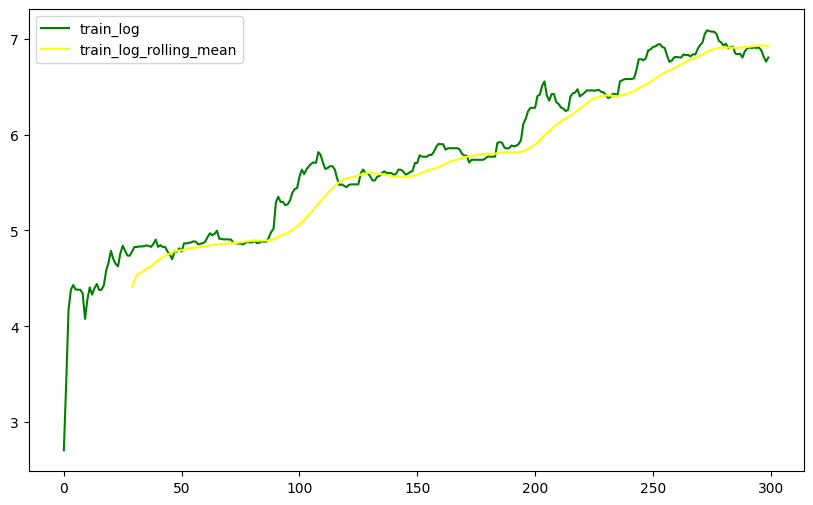

In [38]:
import numpy as np
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(30).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log,color="green",label="train_log") 
plt.plot(mav, color = 'yellow',label="train_log_rolling_mean") 
plt.legend()
plt.show()

# Using auto arima to make predictions using log data

In [39]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:0000:0100:01


In [40]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-739.307, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-666.985, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-744.088, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-737.062, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-660.083, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-742.919, Time=1.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-743.078, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-740.129, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-742.730, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.455 seconds


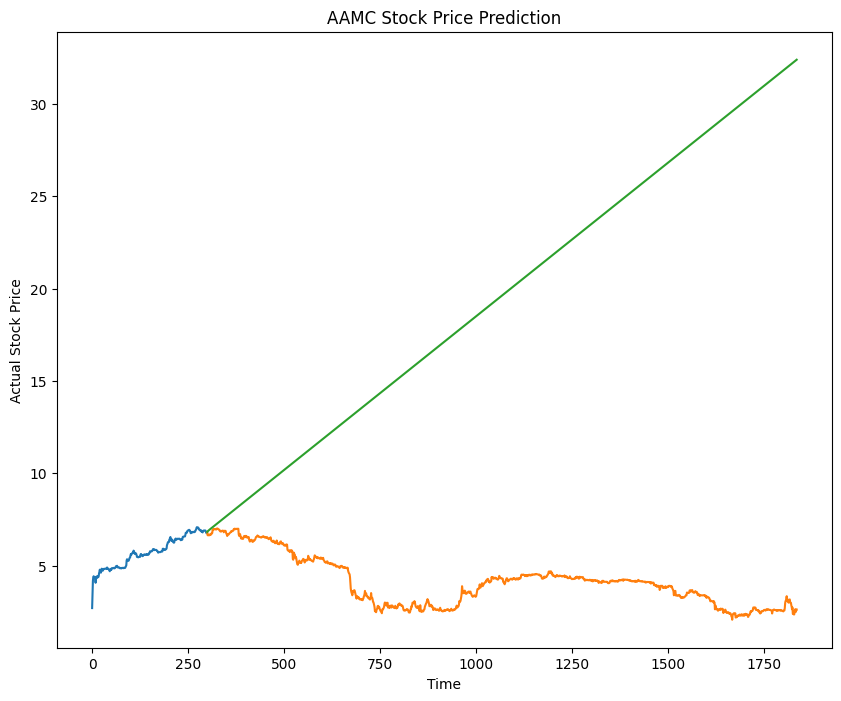

In [41]:
plt.figure(figsize=(10,8))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('AAMC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_log,predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 310.25410833434194


# Merge the Numerical and Textual Data

In [43]:
df1.head()

,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Raju Chacha,0.0,0.0,0.000,0.000,1.00,0.000
1,2001-01-03,'Devdas' Jinxed,0.0,0.0,0.000,0.000,1.00,0.000
2,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.0,0.0,-0.367,0.123,0.81,0.067
3,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.0,0.0,-0.367,0.123,0.81,0.067
4,2001-01-04,Dudhwa tiger died of starvation not poisoning...,0.0,0.0,-0.367,0.123,0.81,0.067


In [44]:
new=df1
data= new[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
data.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.0,0.0,0.000,0.000,1.00,0.000
1,0.0,0.0,0.000,0.000,1.00,0.000
2,0.0,0.0,-0.367,0.123,0.81,0.067
3,0.0,0.0,-0.367,0.123,0.81,0.067
4,0.0,0.0,-0.367,0.123,0.81,0.067


In [45]:
X=data[: 1837]
Y=df2["Close"]

In [46]:
X.shape,Y.shape

((1837, 6), (1837,))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("===================================================================")
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error: 10755.99939993773
R2 Score : 0.8787652827075114


# Combine Prediction Hybrid

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
decision_tree.fit(X_train, y_train)

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
random_forest.fit(X_train, y_train)

# Predictions from Decision Tree
dt_predictions_train = decision_tree.predict(X_train)
dt_predictions_test = decision_tree.predict(X_test)

# Predictions from Random Forest
rf_predictions_train = random_forest.predict(X_train)
rf_predictions_test = random_forest.predict(X_test)

# Combine predictions using average
hybrid_predictions_train = (dt_predictions_train + rf_predictions_train) / 2  # Average
hybrid_predictions_test = (dt_predictions_test + rf_predictions_test) / 2  # Average

# Calculate RMSE
train_rmse = mean_squared_error(y_train, hybrid_predictions_train, squared=False)
test_rmse = mean_squared_error(y_test, hybrid_predictions_test, squared=False)

print("Hybrid Model Train RMSE:", train_rmse)
print("Hybrid Model Test RMSE:", test_rmse)


Hybrid Model Train RMSE: 97.40399059726155
Hybrid Model Test RMSE: 103.73851489294277


In [50]:
from sklearn.metrics import r2_score

# Calculate R2 score
train_r2 = r2_score(y_train, hybrid_predictions_train)
test_r2 = r2_score(y_test, hybrid_predictions_test)

print("Hybrid Model Train R2 Score:", train_r2)
print("Hybrid Model Test R2 Score:", test_r2)


Hybrid Model Train R2 Score: 0.8791353169909086
Hybrid Model Test R2 Score: 0.8787012605810217
